In [6]:
import requests
import pandas as pd
import time
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from bs4 import BeautifulSoup

In [7]:
driver = webdriver.Chrome('C:\\Users\\Bestc\\Desktop\\빅데이터 지능형 서비스 개발과정(멀티캠퍼스)\\설치프로그램\\Selenium\\chromedriver.exe')
naver = 'https://www.naver.com/'
driver.get(naver)
time.sleep(3)
input_query = driver.find_element_by_css_selector('.input_text')
input_query.send_keys('윤석열')
time.sleep(3)
driver.find_element_by_css_selector('.btn_submit').click()
time.sleep(3)
driver.find_element_by_xpath("//*[@id='lnb']/div[1]/div/ul/li[2]/a").click()
time.sleep(3)

In [8]:
import re
raw_data_list = []
for i in range(400):
    try:
        html = driver.page_source
        soup = BeautifulSoup(html, 'html.parser')
        raw_data = soup.select_one('section > div.api_subject_bx > .group_news > .list_news').text
        raw_data = re.sub('[^ㄱ-ㅎㅏ-ㅣ가-힣 ]', '', raw_data)
        raw_data_list.append(raw_data)
        driver.find_element_by_xpath("//*[@id='main_pack']/div[2]/div/a[2]").click()
        time.sleep(3)
    except:
        print(i)

In [9]:
len(raw_data_list)

400

In [11]:
df = pd.DataFrame(list(raw_data_list), columns = ['data'])
df.head()

,data
0,문서 저장하기 에 저장 바로가기 조선일보언론사 선정분 전네이버뉴스 ...
1,문서 저장하기 에 저장 바로가기 조선언론사 선정시간 전네이버뉴스 취...
2,문서 저장하기 에 저장 바로가기 뉴시스언론사 선정시간 전네이버뉴스 ...
3,문서 저장하기 에 저장 바로가기 뉴시스언론사 선정일 전네이버뉴스 청...
4,문서 저장하기 에 저장 바로가기 부산일보언론사 선정시간 전네이버뉴스...


In [13]:
df.data.nunique()

400

In [17]:
df.data.isnull().sum()

0

In [19]:
sdf = pd.read_csv('C:\\Workspace\\python\\Data_Science\\dataA\\한국어불용어100.txt', encoding ='UTF-8', sep = '\s+', header = None)
sdf.head()

,0,1,2
0,이,VCP,0.018280
1,있,VA,0.011699
2,하,VV,0.009774
3,것,NNB,0.009733
4,들,XSN,0.006898


In [23]:
from konlpy.tag import Okt
okt = Okt()
stopwords = set(sdf[0])

In [31]:
from tqdm.notebook import tqdm
tokenized_data = []
for sentence in tqdm(df.data):
    morphs = okt.morphs(sentence.strip(), stem = True)
    temp_list = [word for word in morphs if word not in stopwords]
    tokenized_data.extend(temp_list)

  0%|          | 0/400 [00:00<?, ?it/s]

In [32]:
len(tokenized_data)

243311

In [36]:
tokenized_data[:10]

['문서', '저장', '하다', '에', '저장', '바로가기', '조선일보', '언론사', '선정', '분']

In [37]:
# 한글 폰트 적용
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fonm
from matplotlib import font_manager, rc
mpl.rcParams['axes.unicode_minus'] = False
font_path = "C:/Windows/Fonts/정직_1.ttf"
font = fonm.FontProperties(fname=font_path).get_name()
rc('font', family=font)

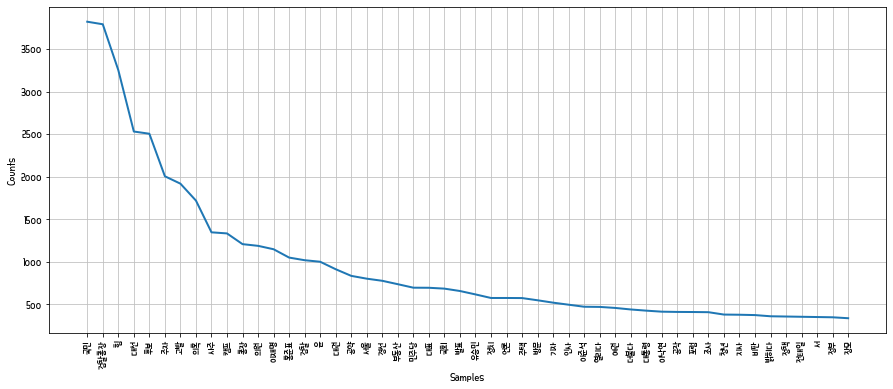

In [58]:
import nltk
stoptext = '''하다 윤석열 문서 저장 에 바로가기 언론사 분 선정 측 의 사단 네이버뉴스 과 는 있다 를 인 은 와 하고 으로
              관련 로 없다 경 당 없다 날 이다 찾다 대해 첫 되다 도 뉴스 에서 을 뉴시스 조선일보 한국 연합뉴스 대 회 비단 위 기
              당시 대한 은 예비 
'''
stopwords2 = stoptext.split()
new_tokens = [word for word in tokenized_data if word not in stopwords2]
keywords = nltk.Text(new_tokens, name = '윤석열 검색결과')
plt.figure(figsize = (15, 6))
keywords.plot(50)
plt.show()

In [59]:
from wordcloud import WordCloud
from PIL import Image

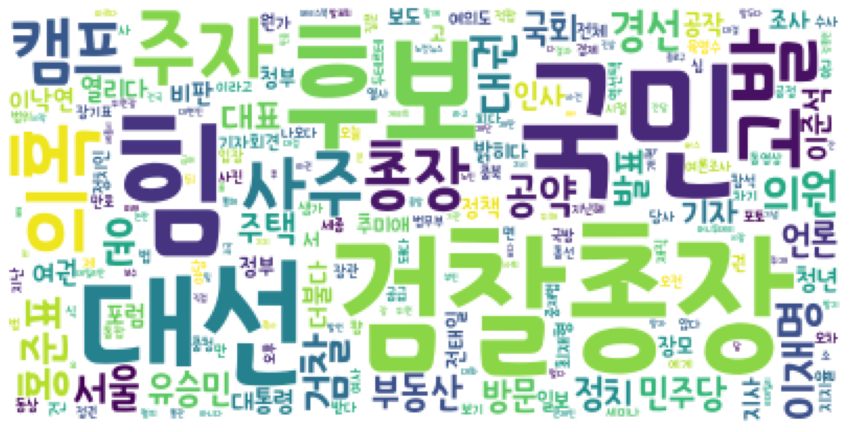

In [60]:
data = keywords.vocab().most_common(300)
wc = WordCloud(
    font_path = font_path, relative_scaling = 0.2,
    background_color = 'white'
).generate_from_frequencies(dict(data))
plt.figure(figsize = (15, 10))
plt.imshow(wc)
plt.axis('off')
plt.show()